# EDA(탐색적 데이터 분석)

## Library

In [116]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

     | 481kB 9.5MB/s
  Running setup.py bdist_wheel for tqdm ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-jc5m3h59/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nan

In [117]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from google.colab import drive 


drive.mount('/content/gdrive')	

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

## Preprocessing

In [119]:
prod = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Pruduct.csv')
mast = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Master.csv')
sess = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Session.csv')
# sear = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Search1.csv')
cust = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Custom.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 자료형 변환
- **object** to **integer**

In [120]:
prod['PD_BUY_AM'] = pd.to_numeric(prod['PD_BUY_AM'].str.replace(',',''))
prod['PD_BUY_CT'][29649] = 1440
prod['PD_BUY_CT'][34105] = 1387
prod['PD_BUY_CT'] = pd.to_numeric(prod['PD_BUY_CT'])

sess['TOT_SESS_HR_V'] = pd.to_numeric(sess['TOT_SESS_HR_V'].str.replace(',',''))
# sess['SESS_HR_PAG_VIEW'] = sess['TOT_SESS_HR_V'] / sess['TOT_PAG_VIEW_CT']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 브랜드명 수정
- 브랜드명에서 **불필요한 단어** 제거(예. 향수, 괄호, 공백 등)
- **잘못입력된** 브랜드명 수정

In [0]:
prod['PD_BRA_NM'] = prod['PD_BRA_NM'].map(lambda x: x.split('(')[0].replace('[','').replace(']','').replace(' ',''))
prod.loc[prod['PD_BRA_NM']=='MADE IN ITALY','PD_BRA_NM'] = 'V73'
prod.loc[prod['PD_BRA_NM'].isin(['1909535','19330640825']),'PD_BRA_NM'] = 'KL'
prod.loc[prod['PD_BRA_NM']=='19386640906','PD_BRA_NM'] = '지이크'
prod.loc[prod['PD_BRA_NM'].isin(['1907517','1924113','1906469','1906471','1902295','1908178','1881326','1924116','1906492','1902287']),'PD_BRA_NM'] = 'CC collect'
prod.loc[prod['PD_BRA_NM'].isin(['19379580904','19364580830','1872892','1898551','18703070925','19359410830']),'PD_BRA_NM'] = '더아이잗'
prod.loc[prod['PD_BRA_NM'].isin(['1904418','1896342']),'PD_BRA_NM'] = '보니스팍스'
prod.loc[prod['PD_BRA_NM'].isin(['1912506','1912518']),'PD_BRA_NM'] = '리스트'
prod.loc[prod['PD_BRA_NM']=='19326280823','PD_BRA_NM'] = 'ENC'
prod.loc[prod['PD_BRA_NM'].isin(['19266920905','19266920905','19266920905']),'PD_BRA_NM'] = '요하넥스'
prod.loc[prod['PD_BRA_NM']=='1913802','PD_BRA_NM'] = '꼼빠니아'
prod.loc[prod['PD_BRA_NM']=='1917759','PD_BRA_NM'] = '인디안'

In [0]:
prod_mast = pd.merge(prod, mast, how = 'inner', on=['PD_C'])


# df[df['PD_BUY_CT']>=150000].sort_values(by=['PD_BUY_AM'],ascending=False)
cate_list= ['패션잡화','여성의류','화장품/뷰티케어','남성의류']
prod_mast = prod_mast[prod_mast['CLAC1_NM'].isin(cate_list)]

#### 명품브랜드만 골라내기

In [123]:
mp1 = pd.read_csv("gdrive/My Drive/공모전/Lpoint/명품 골라내기/lotte_luxury_list.csv")
brand_lotte = list(mp1['BRA_NM'])
mp2 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/명품 골라내기/my_luxury_list.csv')
brands = brand_lotte
brands.extend(mp2['title'])
brands = list(set(brands))
len(brands)

463

In [124]:
prod_mast = prod_mast[prod_mast['PD_BRA_NM'].isin(brands)]
prod_mast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651270 entries, 0 to 5024890
Data columns (total 12 columns):
CLNT_ID      651270 non-null int64
SESS_ID      651270 non-null int64
HITS_SEQ     651270 non-null int64
PD_C         651270 non-null int64
PD_ADD_NM    651270 non-null object
PD_BRA_NM    651270 non-null object
PD_BUY_AM    651270 non-null int64
PD_BUY_CT    651270 non-null int64
PD_NM        651270 non-null object
CLAC1_NM     651270 non-null object
CLAC2_NM     651270 non-null object
CLAC3_NM     651270 non-null object
dtypes: int64(6), object(6)
memory usage: 64.6+ MB


#### 다른 데이터와 결합하기

In [0]:
pmc = pd.merge(prod_mast, cust, how = 'left', on=['CLNT_ID'])
pms = pd.merge(prod_mast, sess, how = 'inner', on=['CLNT_ID','SESS_ID'])

## Full dataset

### By Product

In [126]:
df_pm = prod_mast.groupby(['CLAC2_NM','PD_BRA_NM']).agg({'PD_BUY_AM':'mean','PD_BUY_CT':'sum'}).reset_index()
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 4 columns):
CLAC2_NM     1636 non-null object
PD_BRA_NM    1636 non-null object
PD_BUY_AM    1636 non-null float64
PD_BUY_CT    1636 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 51.2+ KB


In [127]:
df_pm['PD_BUY_AM'] = round(df_pm['PD_BUY_AM']).map(lambda x: int(x))
df_pm['PD_SALES'] = df_pm['PD_BUY_AM']*df_pm['PD_BUY_CT']
df_pm.head()

,CLAC2_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_SALES
0,남성가방,겐조,257250,8,2058000
1,남성가방,구찌,1291940,67,86559980
2,남성가방,금강제화,77000,7,539000
3,남성가방,내셔널지오그래픽,87476,621,54322596
4,남성가방,닥스,290911,36,10472796


### By Customer


In [128]:
pmc.fillna('None')
pmc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651270 entries, 0 to 651269
Data columns (total 14 columns):
CLNT_ID        651270 non-null int64
SESS_ID        651270 non-null int64
HITS_SEQ       651270 non-null int64
PD_C           651270 non-null int64
PD_ADD_NM      651270 non-null object
PD_BRA_NM      651270 non-null object
PD_BUY_AM      651270 non-null int64
PD_BUY_CT      651270 non-null int64
PD_NM          651270 non-null object
CLAC1_NM       651270 non-null object
CLAC2_NM       651270 non-null object
CLAC3_NM       651270 non-null object
CLNT_GENDER    524795 non-null object
CLNT_AGE       524795 non-null float64
dtypes: float64(1), int64(6), object(7)
memory usage: 74.5+ MB


In [0]:
# pmc[pmc['CLNT_GENDER'].isnull()]['CLNT_GENDER'] = '비회원'
# pmc[pmc['CLNT_AGE'].isnull()]['CLNT_AGE'] = '비회원'
pmc = pmc.fillna('비회원')

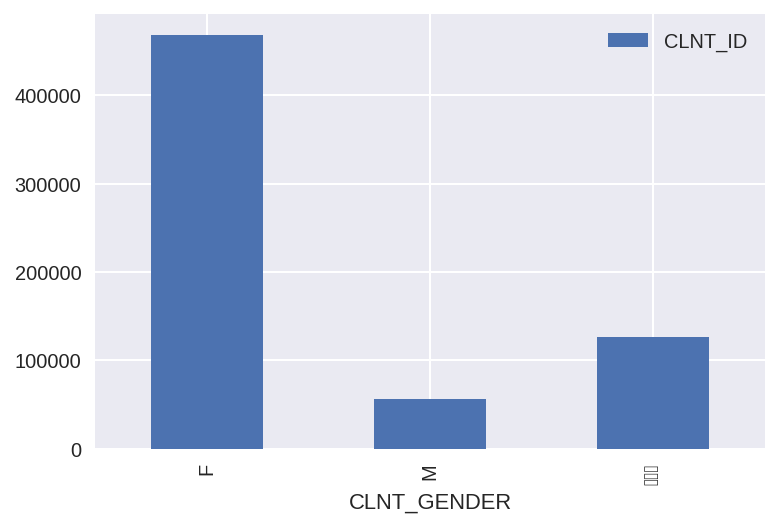

In [130]:
pmc.groupby(['CLNT_GENDER']).agg({'CLNT_ID':'count'}).plot(kind='bar')

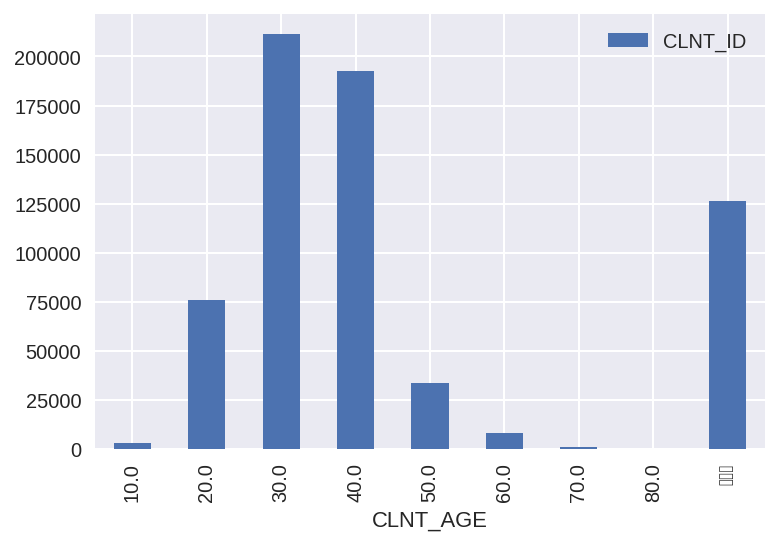

In [131]:
df_pmc = pmc.groupby(['CLNT_AGE']).agg({'CLNT_ID':'count'}).plot(kind='bar')

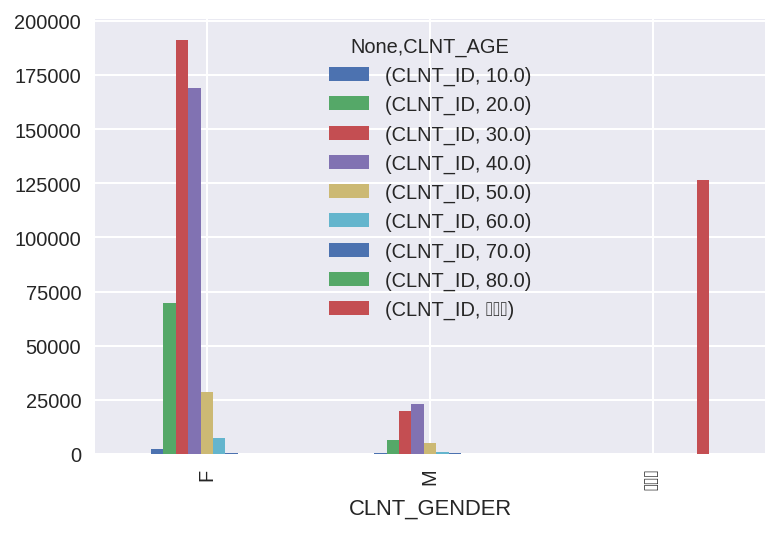

In [132]:
pmc.groupby(['CLNT_GENDER','CLNT_AGE']).agg({'CLNT_ID':'count'}).unstack().plot(kind='bar')

### By Session

In [133]:
pms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651270 entries, 0 to 651269
Data columns (total 19 columns):
CLNT_ID            651270 non-null int64
SESS_ID            651270 non-null int64
HITS_SEQ           651270 non-null int64
PD_C               651270 non-null int64
PD_ADD_NM          651270 non-null object
PD_BRA_NM          651270 non-null object
PD_BUY_AM          651270 non-null int64
PD_BUY_CT          651270 non-null int64
PD_NM              651270 non-null object
CLAC1_NM           651270 non-null object
CLAC2_NM           651270 non-null object
CLAC3_NM           651270 non-null object
SESS_SEQ           651270 non-null int64
SESS_DT            651270 non-null int64
TOT_PAG_VIEW_CT    651227 non-null float64
TOT_SESS_HR_V      648982 non-null float64
DVC_CTG_NM         651270 non-null object
ZON_NM             651270 non-null object
CITY_NM            651270 non-null object
dtypes: float64(2), int64(8), object(9)
memory usage: 99.4+ MB


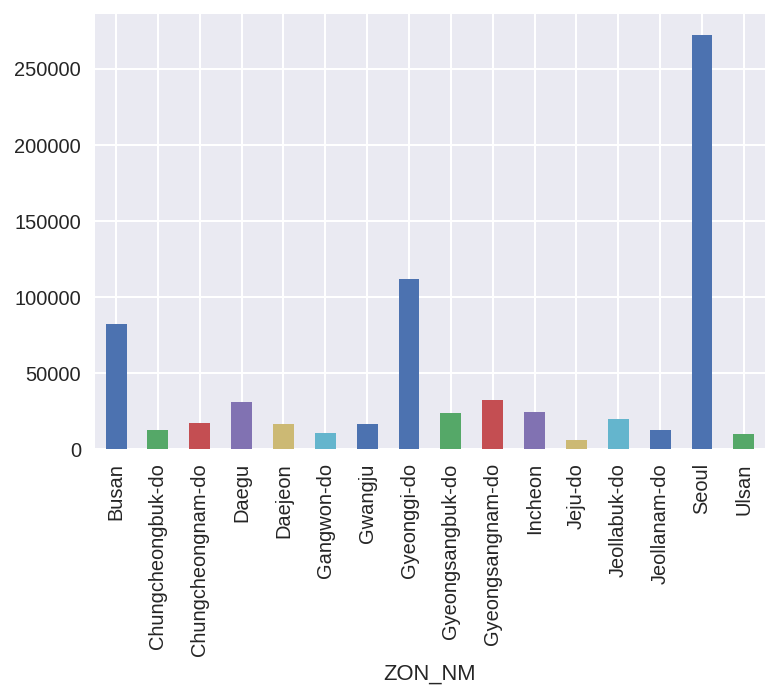

In [144]:
pms.groupby(['ZON_NM'])['PD_BUY_CT'].sum().plot(kind='bar')

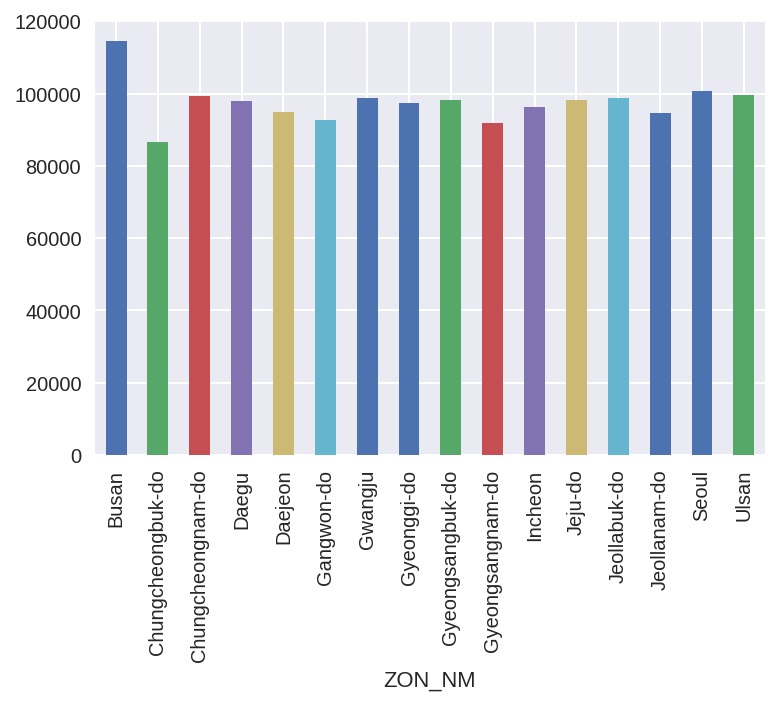

In [146]:
pms.groupby(['ZON_NM'])['PD_BUY_AM'].mean().plot(kind='bar')

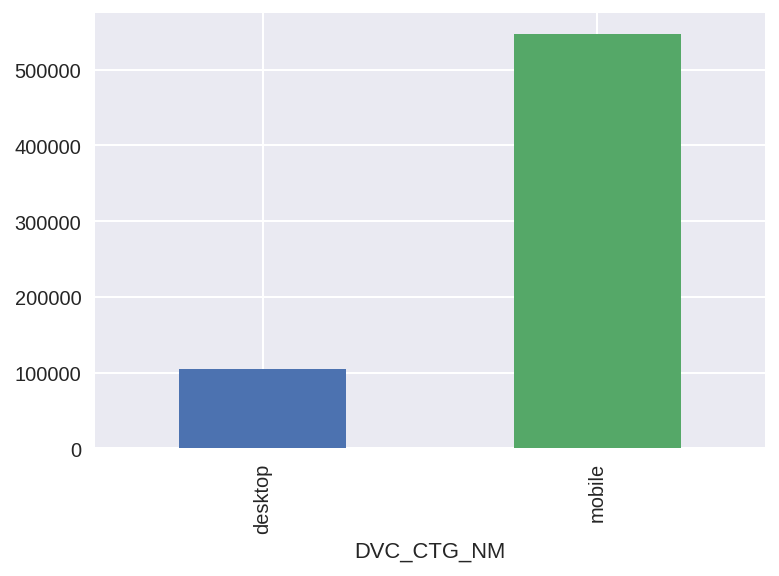

In [143]:
pms.loc[pms['DVC_CTG_NM'] == 'tablet','DVC_CTG_NM'] = 'mobile'
df_pms_d = pms.groupby(['DVC_CTG_NM'])['CLNT_ID'].count().plot(kind='bar')

### Merge ALL

In [138]:
full_data =  pd.merge(df_pm,df_pmc, how='inner', on=['CLAC2_NM','PD_BRA_NM'])
full_data =  pd.merge(full_data,df_pms, how='inner', on=['CLAC2_NM','PD_BRA_NM'])
full_data.info()

ValueError: ignored

In [0]:
full_data.to_csv('gdrive/My Drive/공모전/Lpoint/EDA/full_data.csv',index=False)

In [0]:
lux_data =  pd.merge(df_pm,df_pmc, how='inner', on=['CLAC2_NM','PD_BRA_NM'])
lux_data =  pd.merge(lux_data,df_pms, how='inner', on=['CLAC2_NM','PD_BRA_NM'])
lux_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265259 entries, 0 to 265258
Data columns (total 12 columns):
CLAC2_NM       265259 non-null object
PD_BRA_NM      265259 non-null object
PD_BUY_AM      265259 non-null int64
PD_BUY_CT      265259 non-null int64
PD_SALES       265259 non-null int64
CLNT_GENDER    265259 non-null object
CLNT_AGE       265259 non-null float64
CLNT_ID        265259 non-null int64
DVC_CTG_NM     265259 non-null object
CLNT_ID_x      265259 non-null int64
ZON_NM         265259 non-null object
CLNT_ID_y      265259 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 26.3+ MB


In [0]:
lux_data.to_csv('gdrive/My Drive/공모전/Lpoint/EDA/lux_data.csv',index=False)

## EDA

### 준비

In [0]:
lux_data.columns

Index(['CLAC2_NM', 'PD_BRA_NM', 'PD_BUY_AM', 'PD_BUY_CT', 'PD_SALES',
       'CLNT_GENDER', 'CLNT_AGE', 'CLNT_ID', 'DVC_CTG_NM', 'CLNT_ID_x',
       'ZON_NM', 'CLNT_ID_y'],
      dtype='object')



### Q. 명품을 가장 많이 소비하는 소비층은?


In [0]:
df_l = lux_data.groupby(['CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().reset_index()
df_l.head()

,CLNT_GENDER,CLNT_AGE,PD_BUY_CT
0,F,10.0,23966362
1,F,20.0,31680517
2,F,30.0,31799214
3,F,40.0,31800887
4,F,50.0,31666579


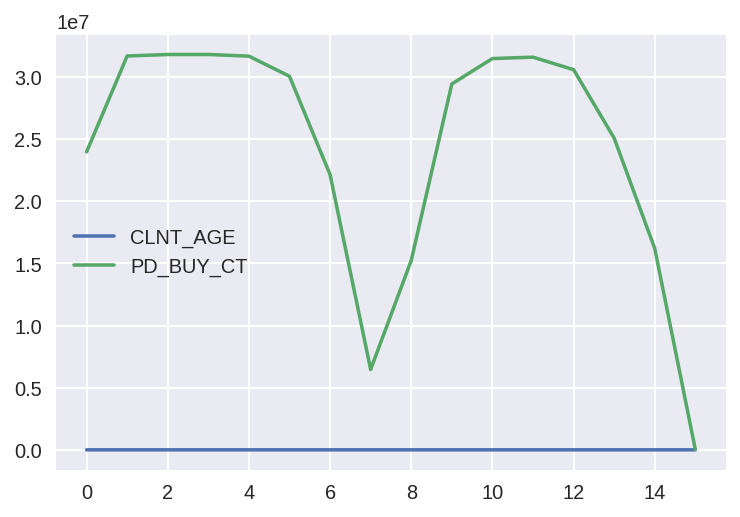

In [0]:
df_l.plot()

### Q. 명품 중 가장 선호하는 카테고리는? (연령 성비) 

In [0]:
df = lux_data.groupby([])

In [0]:
df.plot(kind='bar',x='PD_BRA_NM')

### Q. 가장 많이 검색되는 키워드는?
